<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 </h1>
<h2> Data Visualisation References</h2> 

- 1 [Distribution](#1)
    - 1.1 [Boxplot](#1.1)
    - 1.1 [Histogram](#1.2)
- 2 [Trends](#2)
    - 2.1 [Line](#2.1)
    - 2.2 [Scatter](#2.2)
- 3 [Categorical](#3)
    - 3.1 [Barchart](#3.1)
    - 3.2 [Clustered Bar Chart](#3.2)
    - 3.3 [Stacked Bar Chart](#3.3)
- 4 [Bonus](#4)
    - 4.1 [Jointplot](#4.1)
    - 4.2 [Wordcloud](#4.2)

### Import Libraries

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.1f}'.format
# Plot static image in Jupyter notebook
%matplotlib inline
# Settings throughout the notebook
sns.set()

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Types of Charts </font> </h2></a>

We'll go through several chart and examples and their use cases.

<a id='1'><h3>1 Understanding Distribution</h3></a>
<a id='1.1'><h3>1.1 Boxplot(s)</h3></a>

A boxplot is useful to check for outliers in a dataset. To plot a boxplot, simply use `plot(kind='box')` for the `Series`.

### Wages Dataset

In [2]:
wages_df = pd.read_csv('wages-by-occupation.csv')
wages_df.head()

,Occupation,Weekly_Wage_USD
0,MANAGEMENT,1351
1,CHIEF EXECUTIVES,2041
2,GENERAL AND OPERATIONS MANAGERS,1260
3,MARKETING AND SALES MANAGERS,1462
4,ADMINISTRATIVE SERVICES MANAGERS,1191


Text(0, 0.5, 'US$')

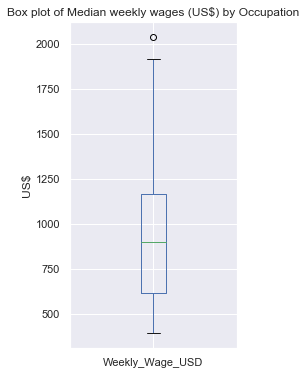

In [3]:
# For box plots, you can only plot using a Series.
fig = plt.figure()
ax = fig.add_subplot(111)
# Plot the boxplot. 
wages_df['Weekly_Wage_USD'].plot(kind='box', 
                            title="Box plot of Median weekly wages (US$) by Occupation", 
                            figsize=(3, 6), ax=ax)
# Set the label of the y-axis
ax.set_ylabel("US$")

<a id='1.2'><h3>1.2 Histogram</h3></a>

A histogram is used to plot the **count** of individual observations within a bin. Each bin has **a specified range** as determined by the position and width of the bar.

Note: If you see the warning `The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.`, you can ignore it.

Text(0, 0.5, 'No. of borrowers')

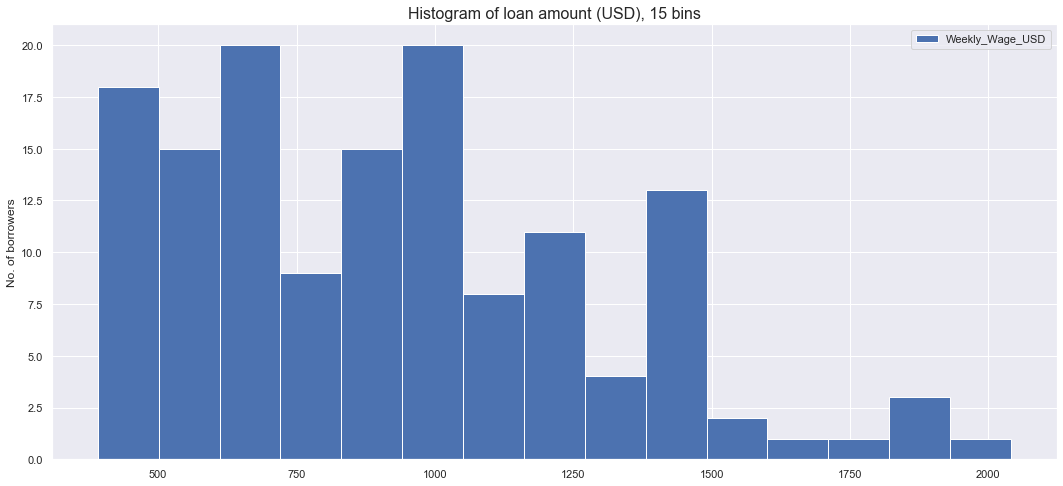

In [4]:
# Plot a histogram for 'loan_amnt'. Use 15 bins.
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(111)

wages_df.plot(kind='hist', 
              ax=ax1, 
              bins=15)

# Set the title and y-axis label.
ax1.set_title("Histogram of loan amount (USD), 15 bins", fontsize=16)
ax1.set_ylabel("No. of borrowers")

<a id='2'><h3>2 Spotting Trends</h3></a>
<a id='2.1'><h3>2.1 Line</h3></a>


A line graph is used to show **a trend in data over time**, or **time-series** data. The $x$-axis will have the various time periods (year, month, day, quarter etc.) and the $y$-axis will show the metric. 

### Singapore Births Dataset

In [5]:
births_df = pd.read_csv('sgp-births.csv')
births_df.head()

,Year,Total Live-births,1st Live-birth
0,1977,38364,16138
1,1978,39441,16424
2,1979,40779,17253
3,1980,41217,17968
4,1981,42250,18599


Text(0, 0.5, 'No. of Births')

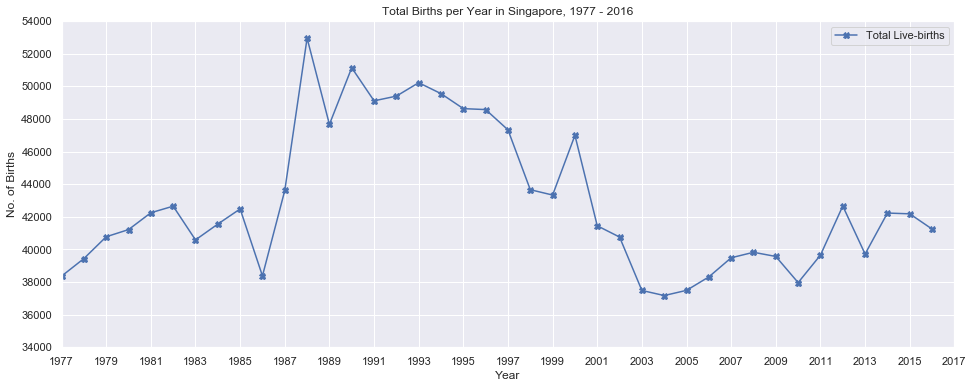

In [6]:
# Always start by creating a figure and adding (empty) subplots.
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)

# Set the title here
ax1.set_title("Total Births per Year in Singapore, 1977 - 2016")

# Plot the df here. specify the kind, x, y, figsize, marker='X' and ax params
births_df.plot(kind='line', x='Year', y='Total Live-births', figsize=(16,6), ax=ax1, marker='X')

#Adjust the x and y axes
ax1.set_xticks(np.arange(1977, 2018, 2))
ax1.set_yticks(np.arange(34000, 55000, 2000))

#Set the y axis label here
ax1.set_ylabel("No. of Births")

<a id='2.2'><h3>2.2 Scatter Plot</h3></a>

A scatter graph can be used to **spot relationships between variables**. Each axis represents a variable, and each coordinate represents the *joint observation* of both variables. The closer all the points are closer to some defined line (linear, quadratic, exponential etc.), the stronger the correlation between the variables *based on that function*.

### Google vs. Apple Closing Prices

In [7]:
goog_df = pd.read_csv('goog-close.csv')
aapl_df = pd.read_csv('aapl-close.csv')
tech_shares_df = goog_df.merge(aapl_df, on='Date')
print(tech_shares_df.head())

         Date  GOOG_Close  AAPL_Close
0  2017-10-09       989.7       157.0
1  2017-10-16       988.2       156.2
2  2017-10-23     1,019.3       163.1
3  2017-10-30     1,032.5       172.5
4  2017-11-06     1,028.1       174.7


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


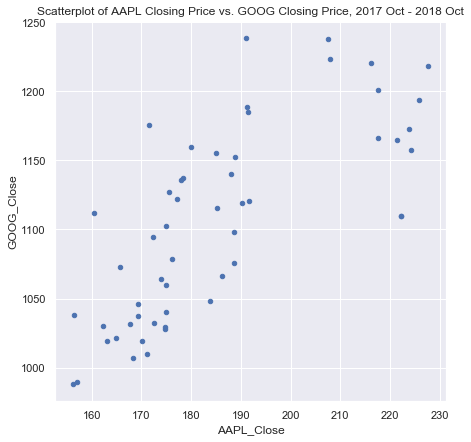

In [8]:
tech_shares_df.plot(kind='scatter', 
                       y='GOOG_Close',
                       x='AAPL_Close',
                       figsize=(7, 7),
                       title="Scatterplot of AAPL Closing Price vs. GOOG Closing Price, 2017 Oct - 2018 Oct")

Also, it is useful to see how related the datasets are using `df.corr()`.

**Conclusion**: With a (Pearson) correlation $\rho=0.732$, the closing price of GOOG and AAPL have strong correlation. Note that strong correlation does **not imply** causation, which means the change in one variable directly causes the change in another variable. In this case, closing price of AAPL does **not necessarily directly impact** the closing price of GOOG. Additional research needs to be performed to ascertain this relationship.

<div class="alert alert-info">
<b>DS102 Learning Guidelines: Additionally, </b> $\rho = r$. Hence, if you intend to perform linear regression on these two security closing prices, you can find $r^2$ by taking the square of the correlation. Linear regression will be covered in Week 5.
</div>

In [9]:
tech_shares_df['AAPL_Close'].corr(tech_shares_df['GOOG_Close'])

0.7317969479475454

<a id='3'><h3>3 Categorical Analysis</h3></a>
<a id='3.1'><h3>3.1 Bar Charts</h3></a>

Bar graphs are used to examine **cross-sectional** or **categorical** data. This involves looking at different **segments** of the population at **one point in time**. It could mean observations at a certain year, quarter or month.

### Patient Admissions Dataset

In [10]:
admissions_df = pd.read_csv('patient-admissions.csv')
admissions_df.head()

,year,gender,age,percentage
0,2014,Male,0 - 14,18.6
1,2014,Male,15 - 64,51.6
2,2014,Male,65 and above,29.8
3,2014,Female,0 - 14,13.9
4,2014,Female,15 - 64,57.9


Text(0.5, 1.0, 'Patient admissions by Age Group, 2014')

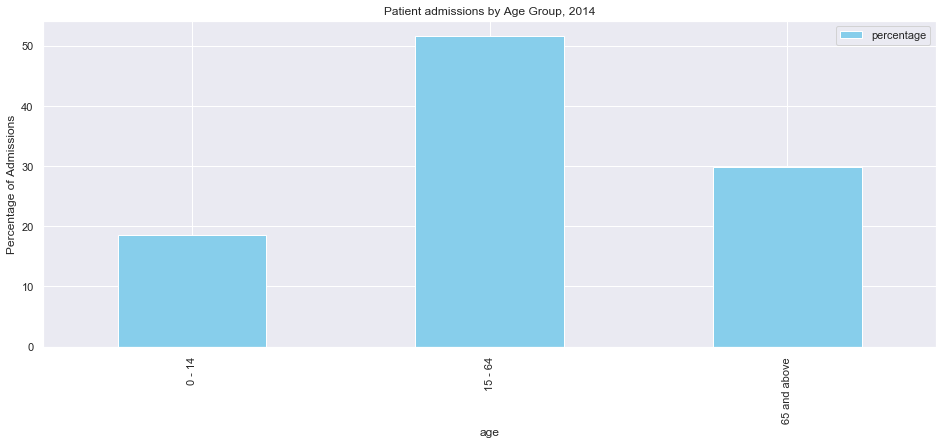

In [11]:
# Filter by Male
admissions_g_df = admissions_df[admissions_df['gender'] == 'Male']

fig, ax = plt.subplots()
# Your turn: Plot the bar plot.
# Specify the kind, x, y, title, figsize, ax and color='skyblue' params
admissions_g_df.plot(kind='bar', x='age', y='percentage',
                figsize=(16,6), ax=ax, color='skyblue')
# Add the ylabel using ax.set_ylabel()
ax.set_ylabel("Percentage of Admissions")
ax.set_title("Patient admissions by Age Group, 2014")

<a id='3.2'><h3>3.2 Clustered Bar Charts</h3></a>


To plot a clustered bar plot, add **both** `Series` to the same subplot. Use `ax=ax` to for this. For the `position` parameter, the **rightmost bar is the smallest number**, starting from `1`. The `width` of the bar needs to be adjusted too. Finally, for the `color` value, use [this link](https://python-graph-gallery.com/100-calling-a-color-with-seaborn/) to find good color representations that are soothing for the eye.

In [12]:
admissions_by_gender_df = pd.read_csv('patient-admissions-by-gender.csv')
# admissions_by_gender_df = admissions_by_gender_df[['age', 'male_percentage', 'female_percentage']]
# admissions_by_gender_df = admissions_by_gender_df.set_index('age')
admissions_by_gender_df

,year,age,male_percentage,female_percentage
0,2014,0 - 14,18.6,13.9
1,2014,15 - 64,51.6,57.9
2,2014,65 and above,29.8,28.2


Text(0, 0.5, 'Percentage of patients with gender')

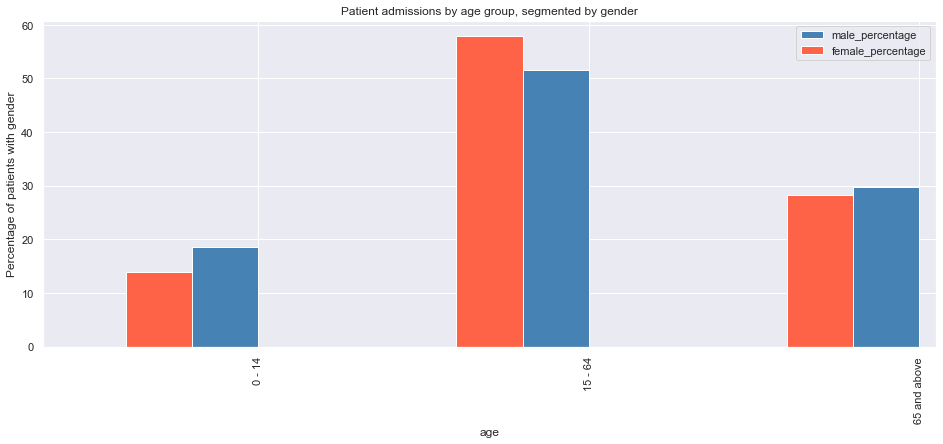

In [13]:
width=0.20

# Create the figure
fig = plt.figure(figsize=(16,6))
# Add the subplot
ax = fig.add_subplot(111)

# Plot the values for 'male_percentage' Specify position=1
admissions_by_gender_df.plot(kind='bar', x='age', y='male_percentage', 
                             ax=ax, position=1, width=width, color='steelblue')
# Plot the values for 'female_percentage' Specify position=2
admissions_by_gender_df.plot(kind='bar', x='age', y='female_percentage', 
                             ax=ax, position=2, width=width, color='tomato')

# Your turn: Add the title of the plot
ax.set_title("Patient admissions by age group, segmented by gender")
ax.set_ylabel("Percentage of patients with gender")

<a id='3.3'><h3>3.3 Bar Charts</h3></a>

A stacked bar chart can be used to see the number of observations within a cohort, and the cohort's cumulative sum. In this case, we want to see how many patients belonging to each age divided by gender. Hence, we group the data by these 2 columns.

,male_percentage,female_percentage
age,,
0 - 14,18.6,13.9
15 - 64,51.6,57.9
65 and above,29.8,28.2


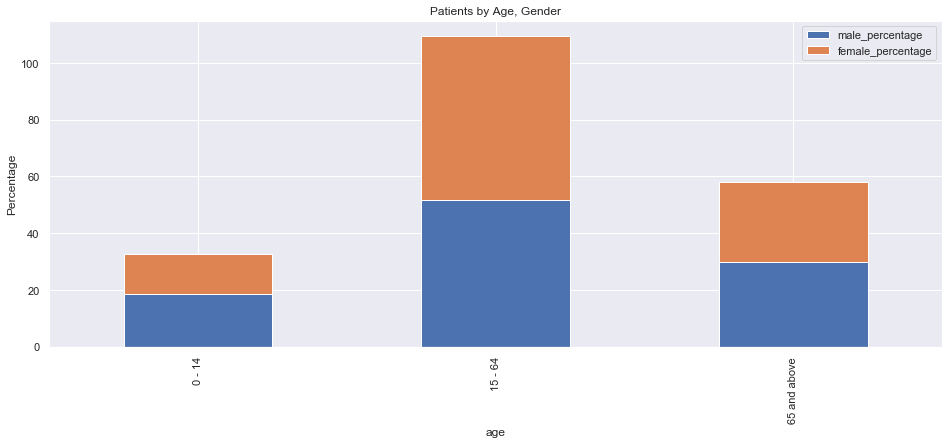

In [14]:
# Data Preparation
admissions_by_gender_df = admissions_by_gender_df[['age', 'male_percentage', 'female_percentage']]
admissions_by_gender_age_df = admissions_by_gender_df.set_index('age')
display(admissions_by_gender_age_df)

# Plot the stacked bar chart here
fig, ax1 = plt.subplots()
admissions_by_gender_age_df.plot(kind='bar', 
                                 stacked=True,  # <<< stacked
                                 figsize=(16,6), 
                                 title="Patients by Age, Gender",
                                 ax=ax1)
ax1.set_ylabel("Percentage")
plt.show()

<a id='4'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;4.</font><font color="salmon"> Extras (Optional) </font> </h2></a>

<a id='4.1'><h3>4.1 Jointplot</h3></a>

A jointplot is used to see the **joint observation** of datapoints. One axis will show the distribution of one metric while the other axis will show the distribution of the other metric. 

Each hexagon **exists in a 2 dimensional space** that represents a bin corresponding to the **<u>concurrent</u> observation of $X=x$ and $Y=y$**. In this plot, the darker the hexagon, the more observations are in that bin.

<Figure size 432x288 with 0 Axes>

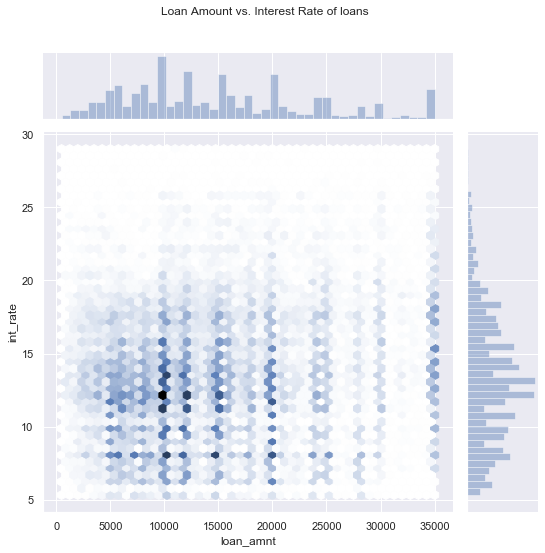

In [15]:
## Dataset 1: Credits at the end of the notebook
# Read 'loans-25k.csv' data into loans_df.
loans_df = pd.read_csv('loans-25k.csv')
fig = plt.figure()

# Plot the joint plot here. Set the x, y and kind='hex' parameter
g = sns.jointplot(data=loans_df, 
                  x = 'loan_amnt', 
                  y = 'int_rate', 
                  kind='hex')

# Set the size of the plot and the title.
g.fig.suptitle('Loan Amount vs. Interest Rate of loans')
g.fig.set_size_inches(8,8)

# Shrink the plot by 10% so the title is visible.
plt.subplots_adjust(top=0.9)

<a id='4.2'><h3>4.2 Wordcloud</h3></a>

A wordcloud is useful to find out what are common words in a corpus of texts. A corpus is simply a collection of text documents. Before building a wordcloud, first collect all the texts.

In [16]:
from wordcloud import WordCloud
import re

In [17]:
# Dataset 2: Credits at the end of the notebook
# Read 'loans-descs-100.csv' data into desc_df. Use the sep = '|' parameter
desc_df = pd.read_csv('loans-descs-100.csv', sep='|')
descriptions_series = desc_df['desc']
descriptions_list = descriptions_series.tolist()

descriptions_list[:5]

['  Borrower added on 06/25/12 > I will use this loan to pay off credit cards and some other loans i have occured in the remodel of my house.<br>',
 '  Borrower added on 01/30/14 > This loan will be used for debt consolidation.<br>',
 '  Borrower added on 08/17/12 > Tell your story. What is your loan for?<br><br> Borrower added on 08/17/12 > Tell your story. What is your loan for?<br><br> Borrower added on 08/17/12 > paying  my  creditcards<br>',
 '  Borrower added on 05/29/13 > I wanted to pay off  all credit debt with low interest rate.<br>Thank you for your offer.<br>',
 '  Borrower added on 01/31/14 > consolidate my debt an get my life back on track.<br>']

### Cleaning the Strings 

To build a wordcloud, all the descriptions need to be connected to form a long string. But, some cleaning needs to be done first. The next steps are used to collect these words:

1. Remove `Borrower added on.. >` in the beginning of the string
2. Remove HTML tags from the descriptions
3. Remove special characters from the descriptions. Remove trailing and leading spaces, convert all words to lower case

In [18]:
descriptions_step1 = []
for d in descriptions_list:
    # Remove the first bunch of letters
    d2 = re.sub('Borrower added on (\d/?)+\s>', '', d)
    # Remove HTML tags
    d2 = re.sub('<[a-z]+/?>', '', d2)
    # Remove special characters
    d2 = re.sub('[-_,$&!.;%]', '', d2)
    # Convert to lower case, remove leading and trailing spaces
    d2 = d2.strip().lower()   
    descriptions_step1.append(d2)

### Joining the Strings

This for loop joins the descriptions together in one long string.

In [19]:
long_str_descriptions = ''
for d in descriptions_step1:
    #simple string concatenation
    long_str_descriptions = long_str_descriptions + ' ' + d

### Visualise Wordcloud

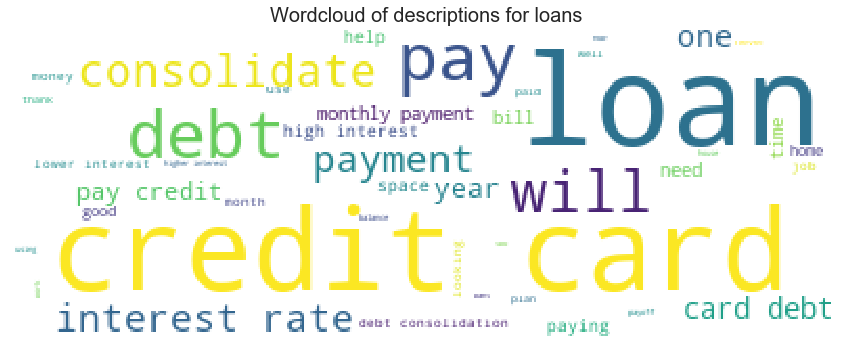

In [20]:
plt.figure(figsize=(15,8))
desc_wordcloud = WordCloud(
    width=400, height=150,
    background_color="white", 
    max_words=150, relative_scaling = 1.0).generate(long_str_descriptions) # add long string in .generate()
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of descriptions for loans", fontsize=20)
plt.show()

**Libraries**
- [matplotlib](https://matplotlib.org/gallery/index.html)
- [seaborn](https://seaborn.pydata.org/examples/index.html)

**Credits**
- [Korea Tourism Organisation](https://kto.visitkorea.or.kr/eng/tourismStatics/keyFacts/visitorArrivals.kto) for Dataset 1 & 7
- [Singstat](https://www.singstat.gov.sg/find-data/search-by-theme/population/births-and-fertility/latest-data) for Dataset 2
- [data.gov.sg](https://data.gov.sg/dataset/hospital-admissions) for Dataset 3
- [Kaggle](https://www.kaggle.com/monkeasy/exploring-gender-equality-in-us-wages/data) for Dataset 4
- [Yahoo Finance GOOG](https://finance.yahoo.com/quote/GOOG) and [Yahoo Finance AAPL](https://finance.yahoo.com/quote/AAPL) for Dataset 5 & 6



**Liability Disclaimer**
<p style="font-size:10px">Notwithstanding any other provision of other agreements between Hackwagon and its trainees, in no event shall any party be liable to another party for any loss of anticipated profits or other consequential, special or indirect loss or damage of any nature arising at any time, whether arising under contract, tort (including negligence), strict liability or for any other cause whatsoever. The trainee understands and agrees that algorithms taught for financial markets are volatile and unpredictable in nature and that no warranty, either express or implied, is made by the company with respect thereto. By continuing with the lesson, the trainee agrees implicitly with the statements prior.</p>